# How Does Chemical Potential Affect Linker Length?

How does the "in-range" parameter $\gamma$ vary with the chemical potential of the system? We expect that at higher chemical potentials, more readers bind the polymer, and there is a stronger driver for shorter bond lengths.

#### Specify Package Root Directory

In [1]:
import os
import sys

# Get the absolute path of the notebook's directory
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Navigate one level up to get the root directory path
root_directory = os.path.abspath(os.path.join(notebook_directory, '..'))

# Change the working directory to the root directory
os.chdir(root_directory)

# Append the root directory to sys.path
sys.path.append(root_directory)

#### Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sliding_nucleosome.nucleo_arr as nuc

#### Characterize Simulations

In [3]:
# Specify the directory containing all simulations
out_dir = "/scratch/users/jwakim/sliding_nucleosome/output_var_cp"

# List simulations
sims = os.listdir(out_dir)
sims = [sim for sim in sims if sim.startswith("sim_") and os.path.isdir(os.path.join(out_dir, sim))]
sim_inds = [int(sim.split("_")[1]) for sim in sims]
sims = [sim for _, sim in sorted(zip(sim_inds, sims))]
sim_inds = np.sort(sim_inds)

# Simulations vary in chemical potential
sim_paths = {}
latest_snap_paths = {}
sim_to_mu = {}
mu_to_sim = {}
all_mu = set()
for i, sim in enumerate(sims):
    
    if (i+1) % 50 == 0:
        print(f"Sim {i+1} of {len(sims)}")

    # Identify the latest snapshot
    sim_path = os.path.join(out_dir, sim)
    sim_paths[sim] = sim_path
    snaps = os.listdir(sim_path)
    snaps = [snap for snap in snaps if snap.startswith("snap_") and snap.endswith(".json")]
    snaps = [snap for snap in snaps if snap != "snap_init.json"]
    snap_inds = [int(snap.split("_")[-1].split(".")[0]) for snap in snaps]
    last_snap = snaps[np.argmax(snap_inds)]
    snap_path = os.path.join(sim_path, last_snap)
    latest_snap_paths[sim] = snap_path
    
    # Load configuration
    nuc_arr = nuc.NucleosomeArray.load(snap_path)
    
    # Identify the chemical potential
    mu = nuc_arr.mu[0]
    sim_to_mu[sim] = mu
    
    # Store the chain length
    if mu not in all_mu:
        mu_to_sim[mu] = [sim]
        all_mu.add(mu)
    else:
        mu_to_sim[mu].append(sim)

Sim 50 of 405
Sim 100 of 405
Sim 150 of 405
Sim 200 of 405
Sim 250 of 405
Sim 300 of 405
Sim 350 of 405
Sim 400 of 405


#### Compute Average In-Range Parameter (Gamma)

In [4]:
all_mu_lst = list(mu_to_sim.keys())

In [5]:
all_avg_gamma = {mu: {} for mu in all_mu_lst}

for mu in all_mu_lst:
    sims = mu_to_sim[mu]
    for sim in sims:
        
        # Identify latest snapshot
        sim_path = sim_paths[sim]
        snap_path = latest_snap_paths[sim]
        
        # Load configuration
        nuc_arr = nuc.NucleosomeArray.load(snap_path)
        
        # Compute average gamma parameter
        all_avg_gamma[mu][sim] = np.average(nuc_arr.gamma)

#### Plot Gamma vs. Chemical Potential for Fixed Chain Length

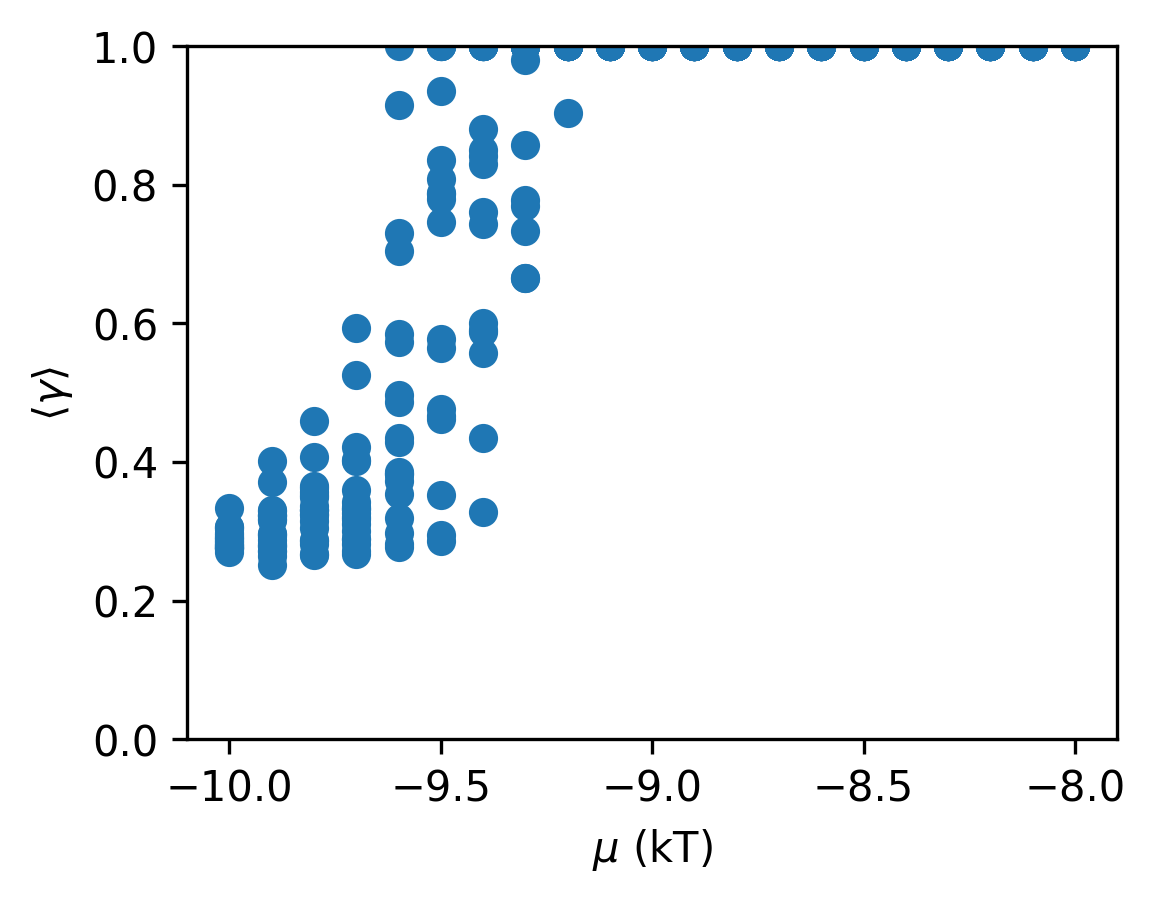

In [6]:
# Prepare lists of chemical potentials and gamma values for the plot
mu_plot = []
avg_gamma_plot = []
for mu in all_avg_gamma.keys():
    for sim in all_avg_gamma[mu]:
        mu_plot.append(mu)
        avg_gamma_plot.append(all_avg_gamma[mu][sim])

# Plot Gamma vs. Chemical Potential
plt.figure(figsize=(4, 3), dpi=300)
plt.scatter(mu_plot, avg_gamma_plot)
plt.xlabel(r"$\mu$ (kT)")
plt.ylabel(r"$\langle\gamma\rangle$")
plt.ylim((0, 1))
plt.show()